In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [39]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [40]:
df.shape

(29922, 6)

In [41]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

1. Change ordered_at to datetime

2. Change price and line_total to float

In [42]:
# TODO: Change ordered_at to datetime
df['ordered_at'] = pd.to_datetime(df['ordered_at'])
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                 object
quantity               int64
line_total            object
dtype: object

In [43]:
# TODO: Change price and line_total to float
for column in ['price', 'line_total']:
    df[column] = df[column].apply(lambda x: float(x[1:]))

In [44]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [45]:
df[df.duplicated()].shape[0]

538

In [46]:
# TODO: use drop_duplicates() here
df.drop_duplicates()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


In [47]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [48]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [49]:
# TODO: use drop.na() here, remember to do it "in place"
df.dropna()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


#### Sanity check for value ranges and to check assumptions

In [50]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [51]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
1. Get rows with **line_total = price * quantity**

2. Then remove if line total < 0

In [59]:
# TODO: Set line_total = price * quantity.
df = df[(df['quantity'] * df['price']) == df['line_total']]

In [60]:
# TODO: Then remove if line total < 0
df = df[df['line_total'] < 0]

In [61]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,282.000000,282,282.000000,282.000000,282.000000
mean,14866.645390,2018-04-12 20:09:09.393617152,-2.551418,2.031915,-5.297872
min,10007.000000,2018-01-01 15:03:17,-4.000000,1.000000,-12.000000
25%,12031.750000,2018-02-13 08:22:17.750000128,-3.500000,1.000000,-7.500000
50%,14754.000000,2018-04-10 05:09:49,-2.500000,2.000000,-4.500000
75%,17704.750000,2018-06-11 03:22:38.750000128,-1.500000,3.000000,-3.000000
max,19953.000000,2018-07-27 22:03:01,-0.500000,3.000000,-0.500000
std,3003.995886,NaN,1.078757,0.783987,3.255425


#### TODO: Get value between "" in name and put it in category column by using .apply
E.g: "ICE CREAM" Peanut Fudge, here we want to extract the phrase "ICE CREAM", and put it in newly created column called **category**

In [62]:
# TODO
pattern = r'^"([A-Z ]+)" (.*)'
transform_func = lambda x: re.findall(pattern, x)[0]

df[['category', 'name']] = df['name'] \
    .apply(transform_func) \
    .apply(pd.Series)

In [63]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
28,10007,Matcha,2018-01-01 15:03:17,-1.5,2,-3.0,ICE CREAM
51,10016,Raspberry,2018-01-01 20:53:59,-2.5,1,-2.5,SORBET
188,10066,Vanilla Bean,2018-01-02 22:46:28,-1.5,3,-4.5,ICE CREAM
267,10090,Blood Orange,2018-01-03 09:05:40,-2.5,2,-5.0,SORBET
524,10174,Earl Gray,2018-01-04 21:10:43,-0.5,2,-1.0,ICE CREAM


#### Analysis, finally!

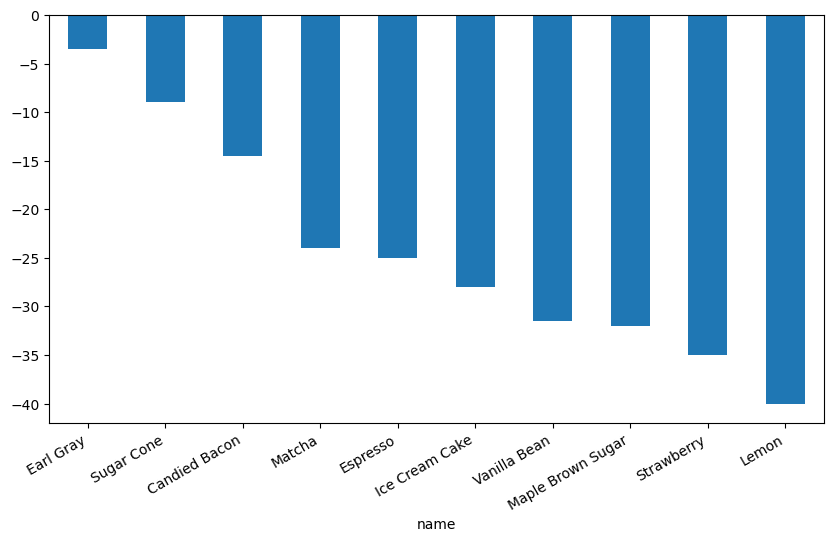

In [64]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()